<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_WEEK7_02%EC%BA%90%EA%B8%80%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 캐글 타이타닉 데이터 분석

**Part 1: 탐색적 데이터 분석 (EDA)**

각 특징(Feature)의 분석

여러 특징 간의 관계나 패턴 탐색

**Part 2: 특성 공학 및 데이터 정제 (Feature Engineering & Data Cleaning)**

새로운 특징 추가

불필요한 특징 제거

모델링에 적합한 형태로 변환

**Part 3: 예측 모델링 (Predictive Modeling)**

기본 알고리즘 실행

교차 검증 (Cross Validation)

앙상블 기법 (Ensembling)

중요한 특징 추출 (Feature Importance Extraction)

##Part1 Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/ESAA/assignment/titanic/train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### how many survived?

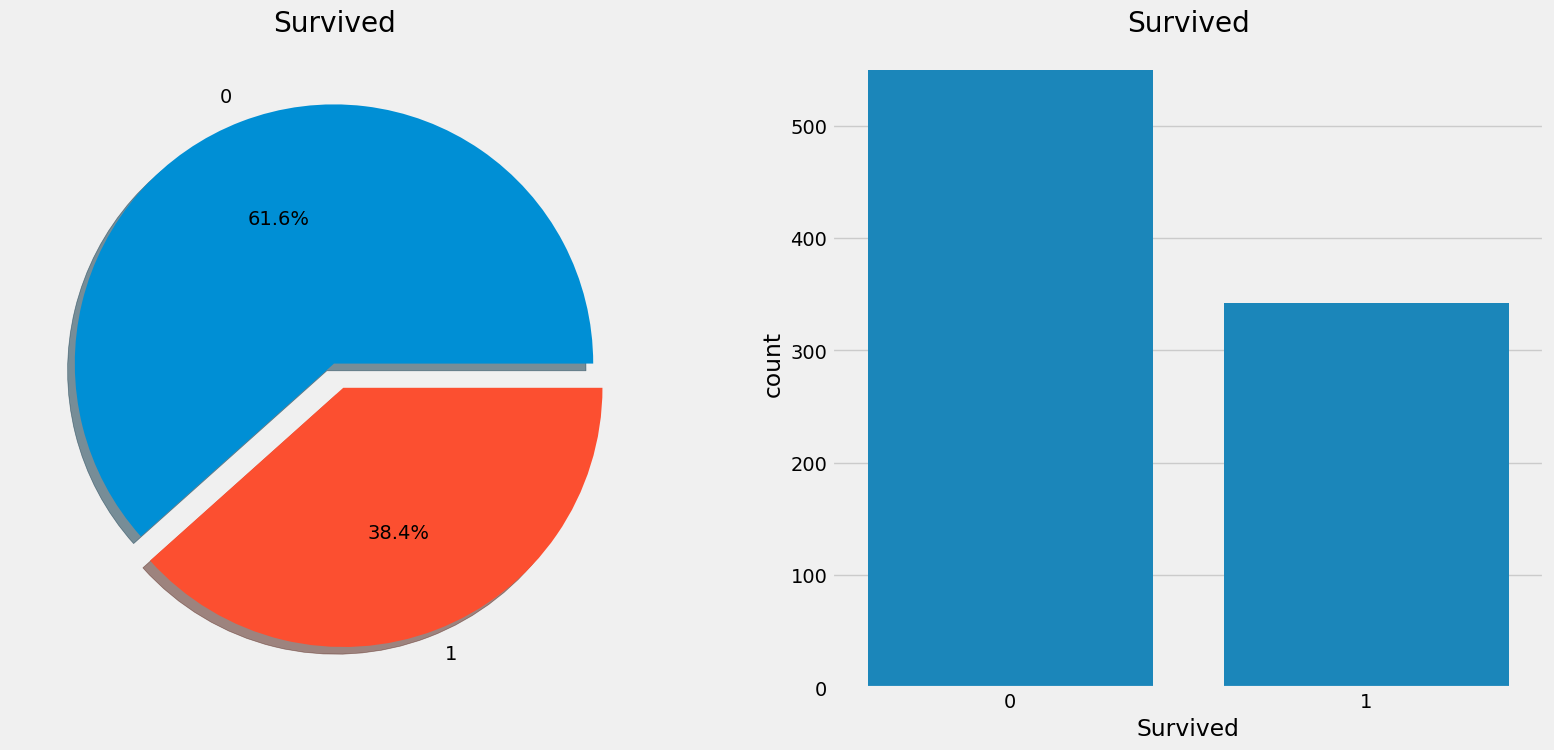

In [ ]:
f, ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

1️⃣ 범주형 특징 (Categorical Features)

범주형 변수는 두 개 이상의 범주(category) 를 가지며, 각 값이 그 범주 중 하나로 분류될 수 있는 변수입니다.
예를 들어, 성별(gender) 은 “남성(male)”과 “여성(female)” 두 가지 범주를 가지는 범주형 변수입니다.
이러한 변수들은 정렬이나 순서를 매길 수 없으며, 명목형 변수(Nominal Variables) 라고도 부릅니다.  
Categorical Features in the dataset: Sex,Embarked

2️⃣ 서열형 특징 (Ordinal Features)

서열형 변수는 범주형 변수와 비슷하지만, 값들 사이에 상대적인 순서나 크기 관계가 존재한다는 점이 다릅니다.
예를 들어, 키(Height) 가 “Tall(키 큼)”, “Medium(보통)”, “Short(작음)”으로 표현된다면, 이는 서열형 변수입니다.
이 경우, 값들 간에 ‘상대적인 순서(정렬)’가 존재합니다.  
Ordinal Features in the dataset: PClass

3️⃣ 연속형 특징 (Continuous Features)

연속형 변수는 최소값과 최대값 사이에서 임의의 값을 가질 수 있는 변수입니다.
즉, 두 점 사이에 무한히 많은 값이 존재할 수 있습니다.  
Continous Features in the dataset: Age

###Analysing The Features

Sex--> Categorical Feature

In [ ]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

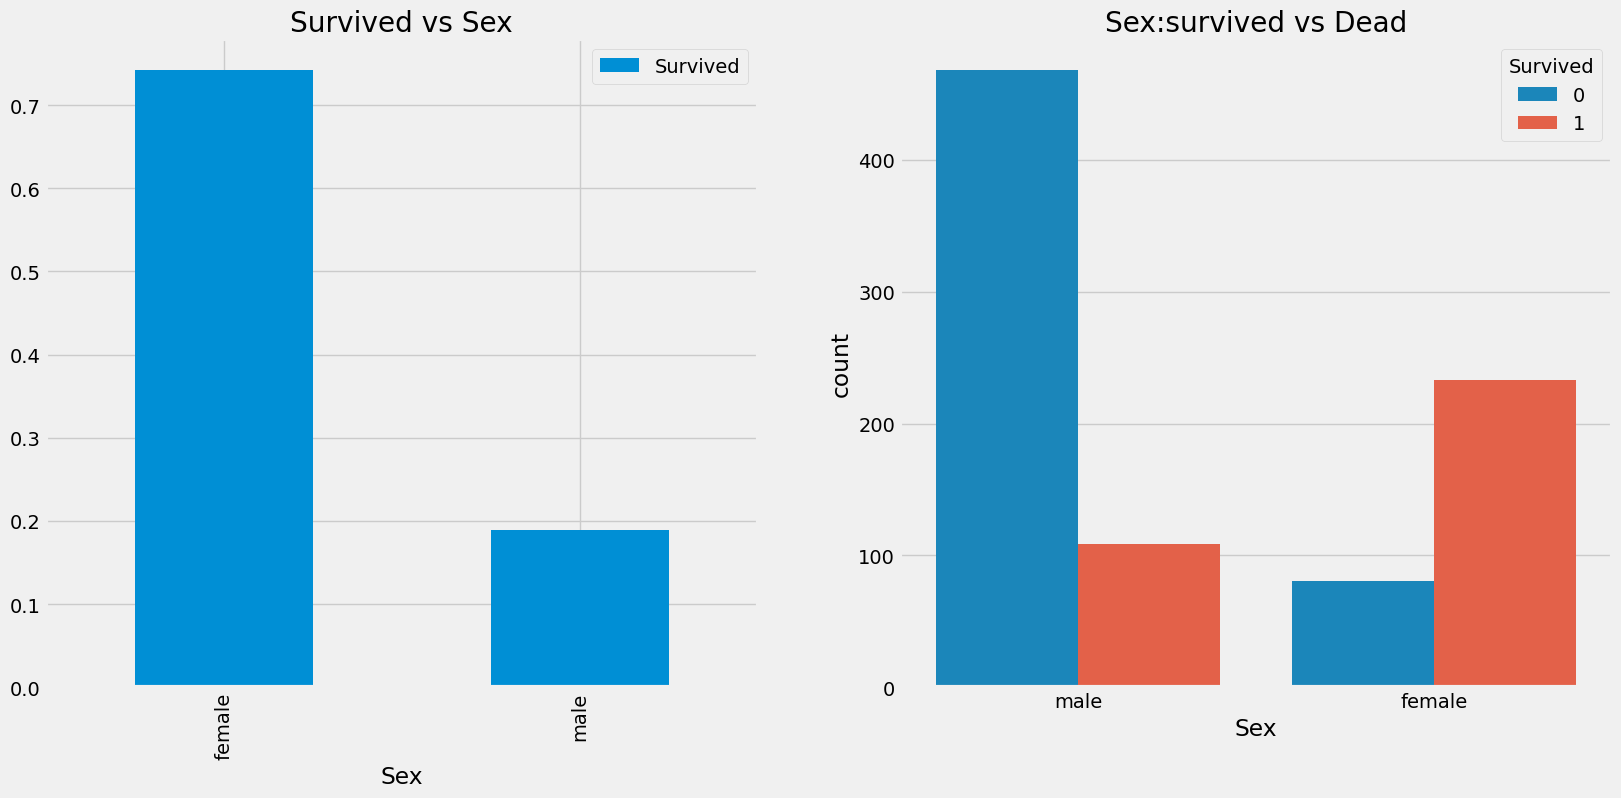

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:survived vs Dead')
plt.show()

여성의 생존확률이 매우 높으므로 중요한 피처

###Pclass-->Ordinal Feature

In [ ]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


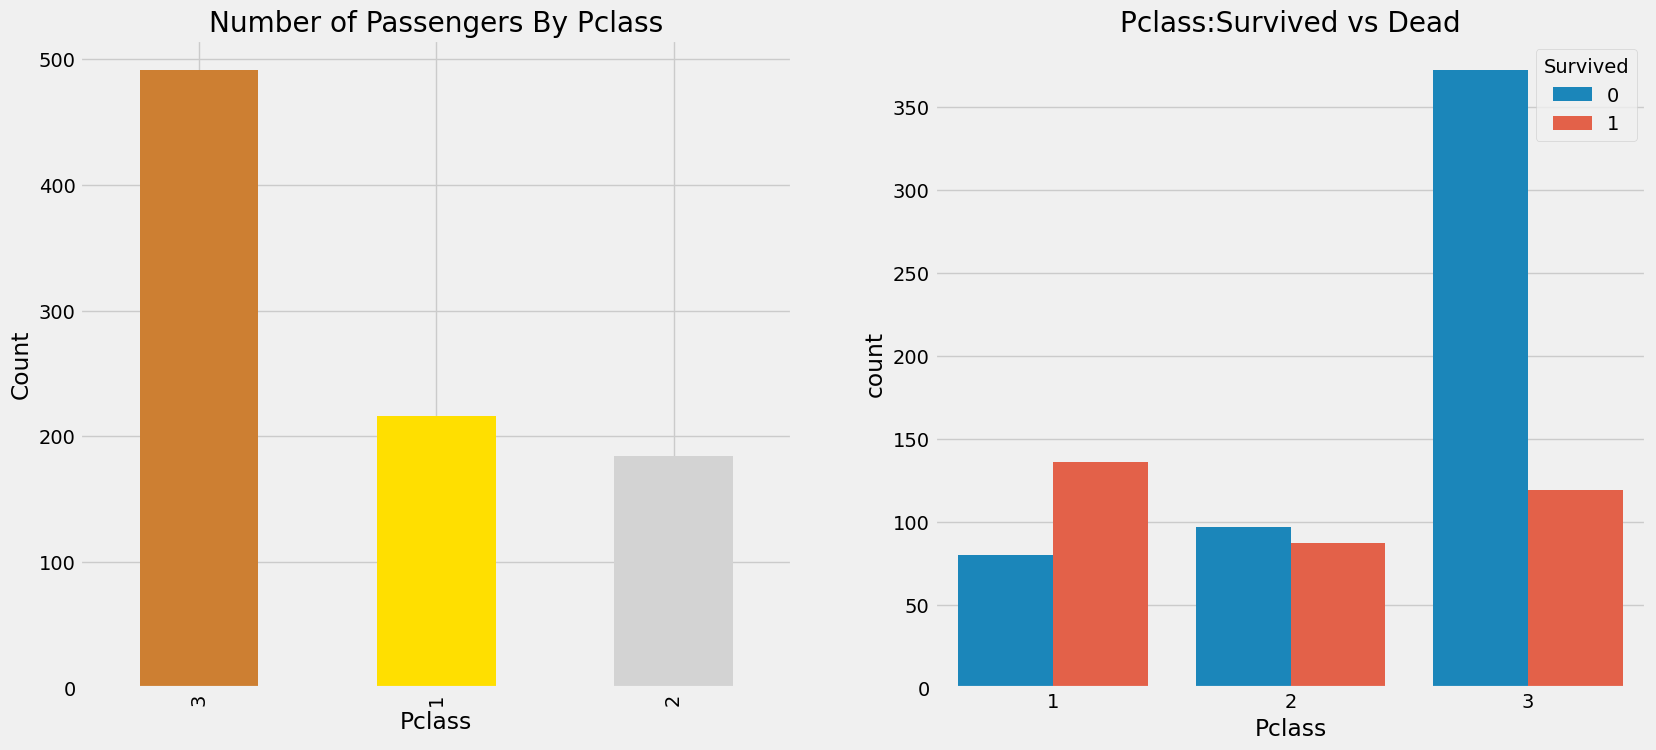

In [ ]:
f, ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

1등실의 생존률이 더 높다

성별과 Pclass를 함께 체크해보자

In [ ]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

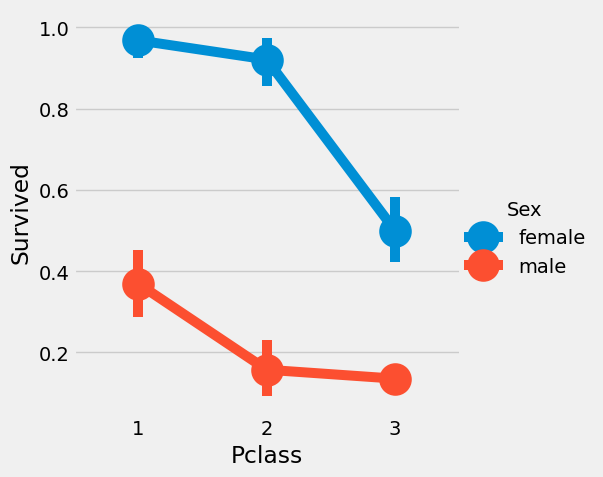

In [ ]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=data,kind='point')
plt.show()

1등실 여성의 생존률이 95-96%이다
선실등급도 중요한 피처이다

###Age--> Continuous Feature

In [ ]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


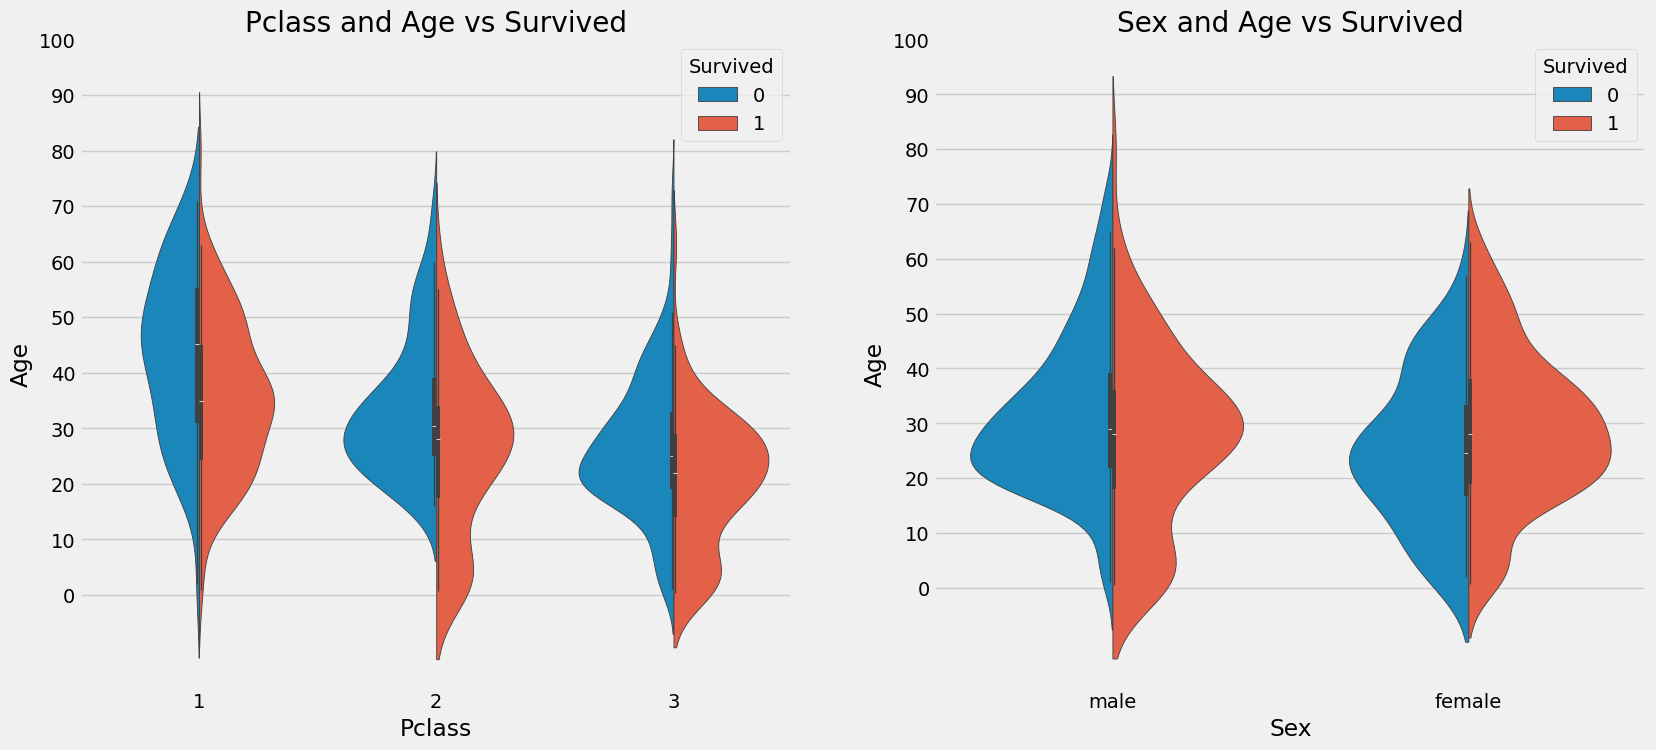

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex',y='Age',hue='Survived',data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

관찰
1. 어린이 수와 객실 등급: 어린이의 수는 객실 등급이 낮을수록 많으나 10세 이하의 생존률은 객실 등급에 상관없이 높다.

2. 성인의 생존률: 일등실 20-50세 승객은 생존 확률이 높고 특히 여성의 생존률이 더욱 높다

3. 남성의 생존률과 나이의 관계: 나이가 많아질수록 생존 확률 감소
>> 어느 정도 이상 증가하면 더 증가하는디...?


* 나이 결측치 채우는 방법: 평균나이로 채우기엔 승객 나이가 매우 다양함>> 이름의 특징을 바탕으로 각 호칭 별 평균 나이 계산하고 채워넣기

In [4]:
data['Initial']=0
for i in data:
  data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')# .이 따라오는 A-Z,a-z 추출



In [ ]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [5]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
 ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [6]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [ ]:
data.Age.isnull().any()#So no null values left finally

np.False_

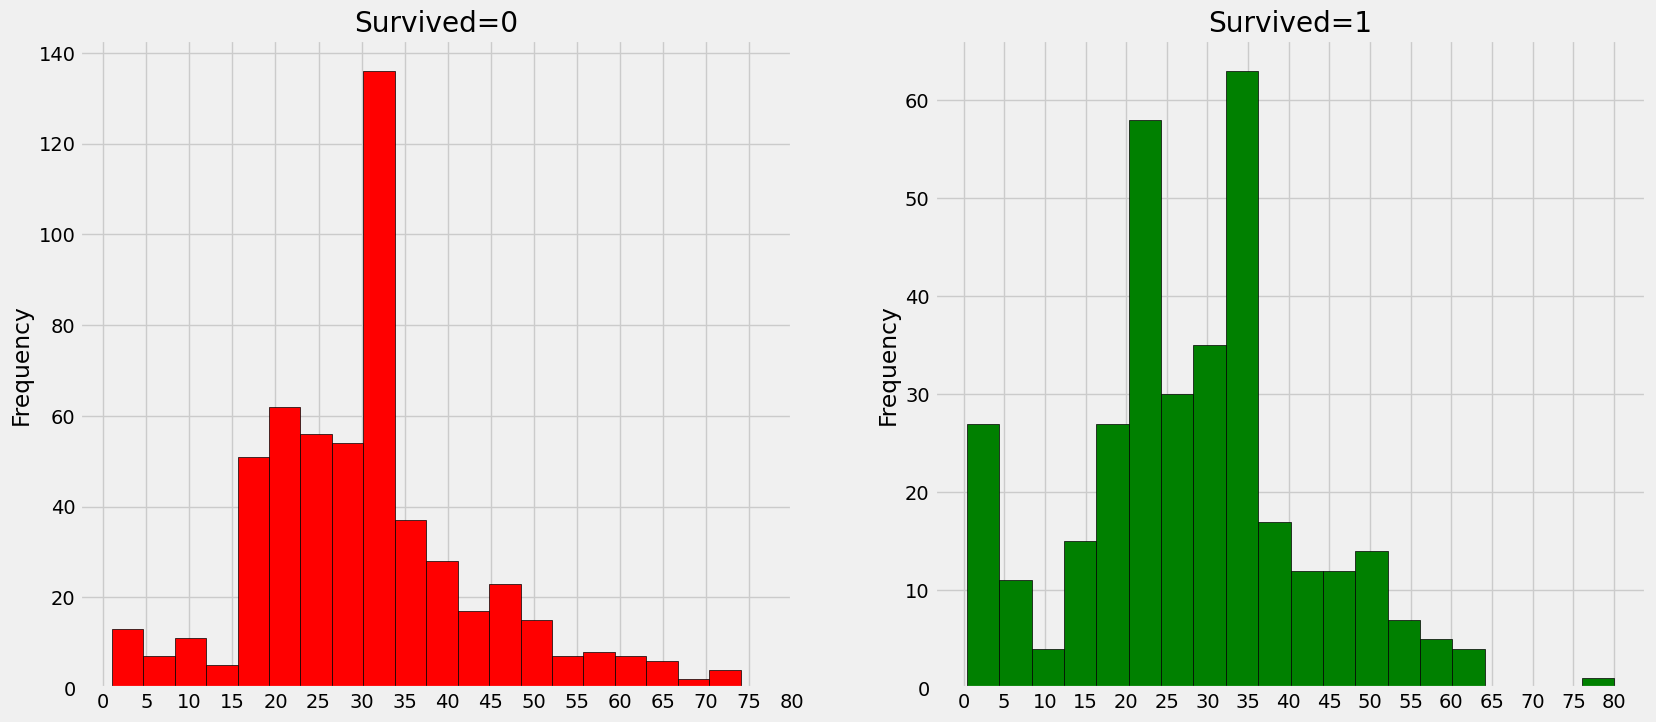

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

관찰
1. 신생아(5세미만)은 대부분 생존
2. 가장 나이가 많은 승객 생존(80세)
3. 가장 많은 죽음은 30-40세 그룹이다.

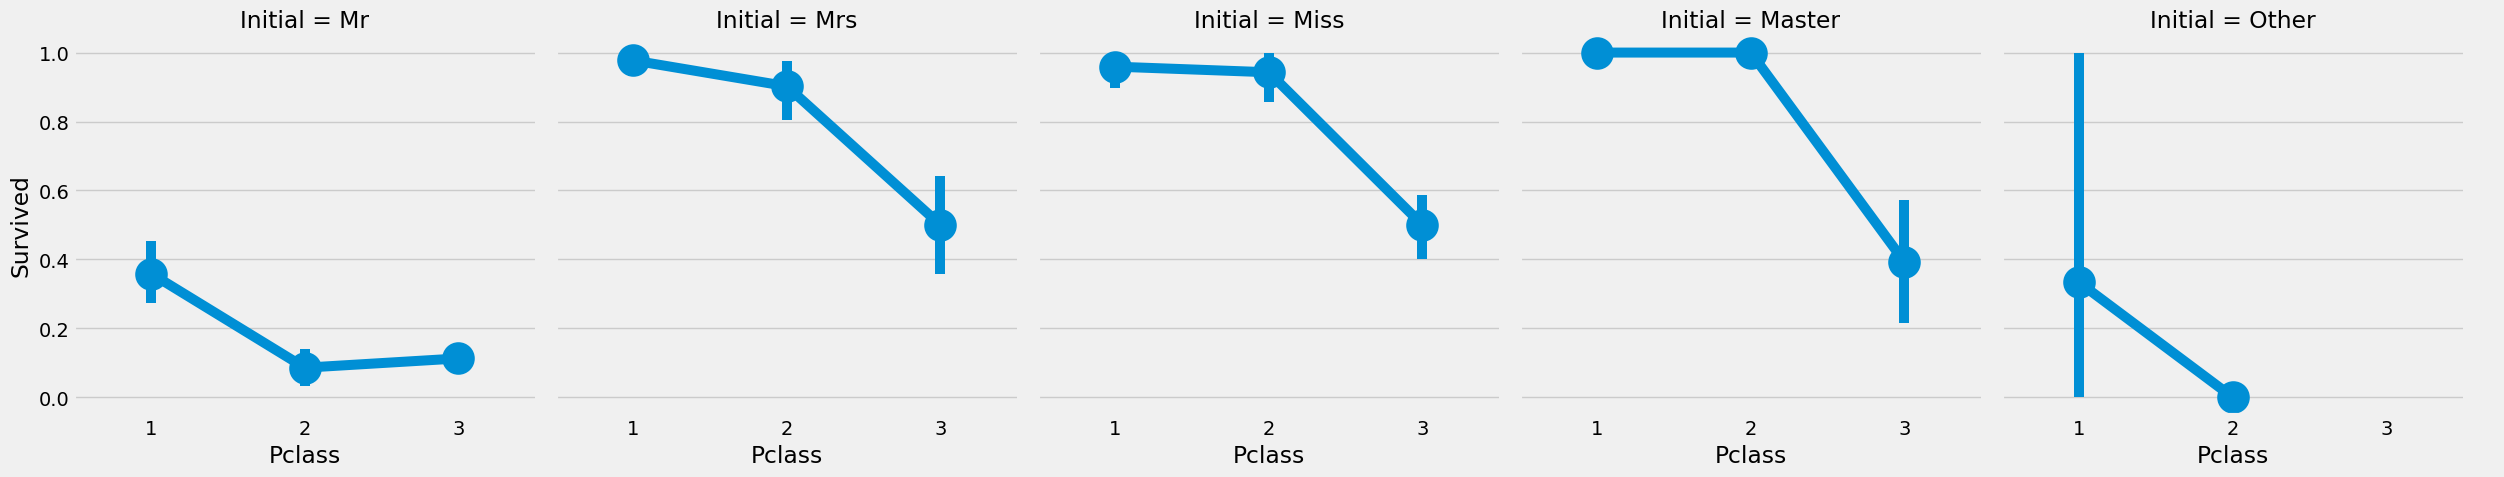

In [ ]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data,kind='point')

여성과 어린이 우선 정책이 객실 등급에 관계 없이 적용되었다

###Embarked-->Categorical Value


In [ ]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

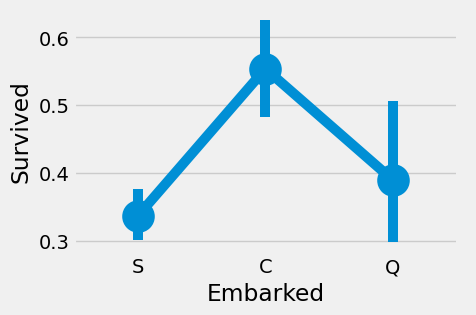

In [ ]:
sns.catplot(x='Embarked',y='Survived',data=data,kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

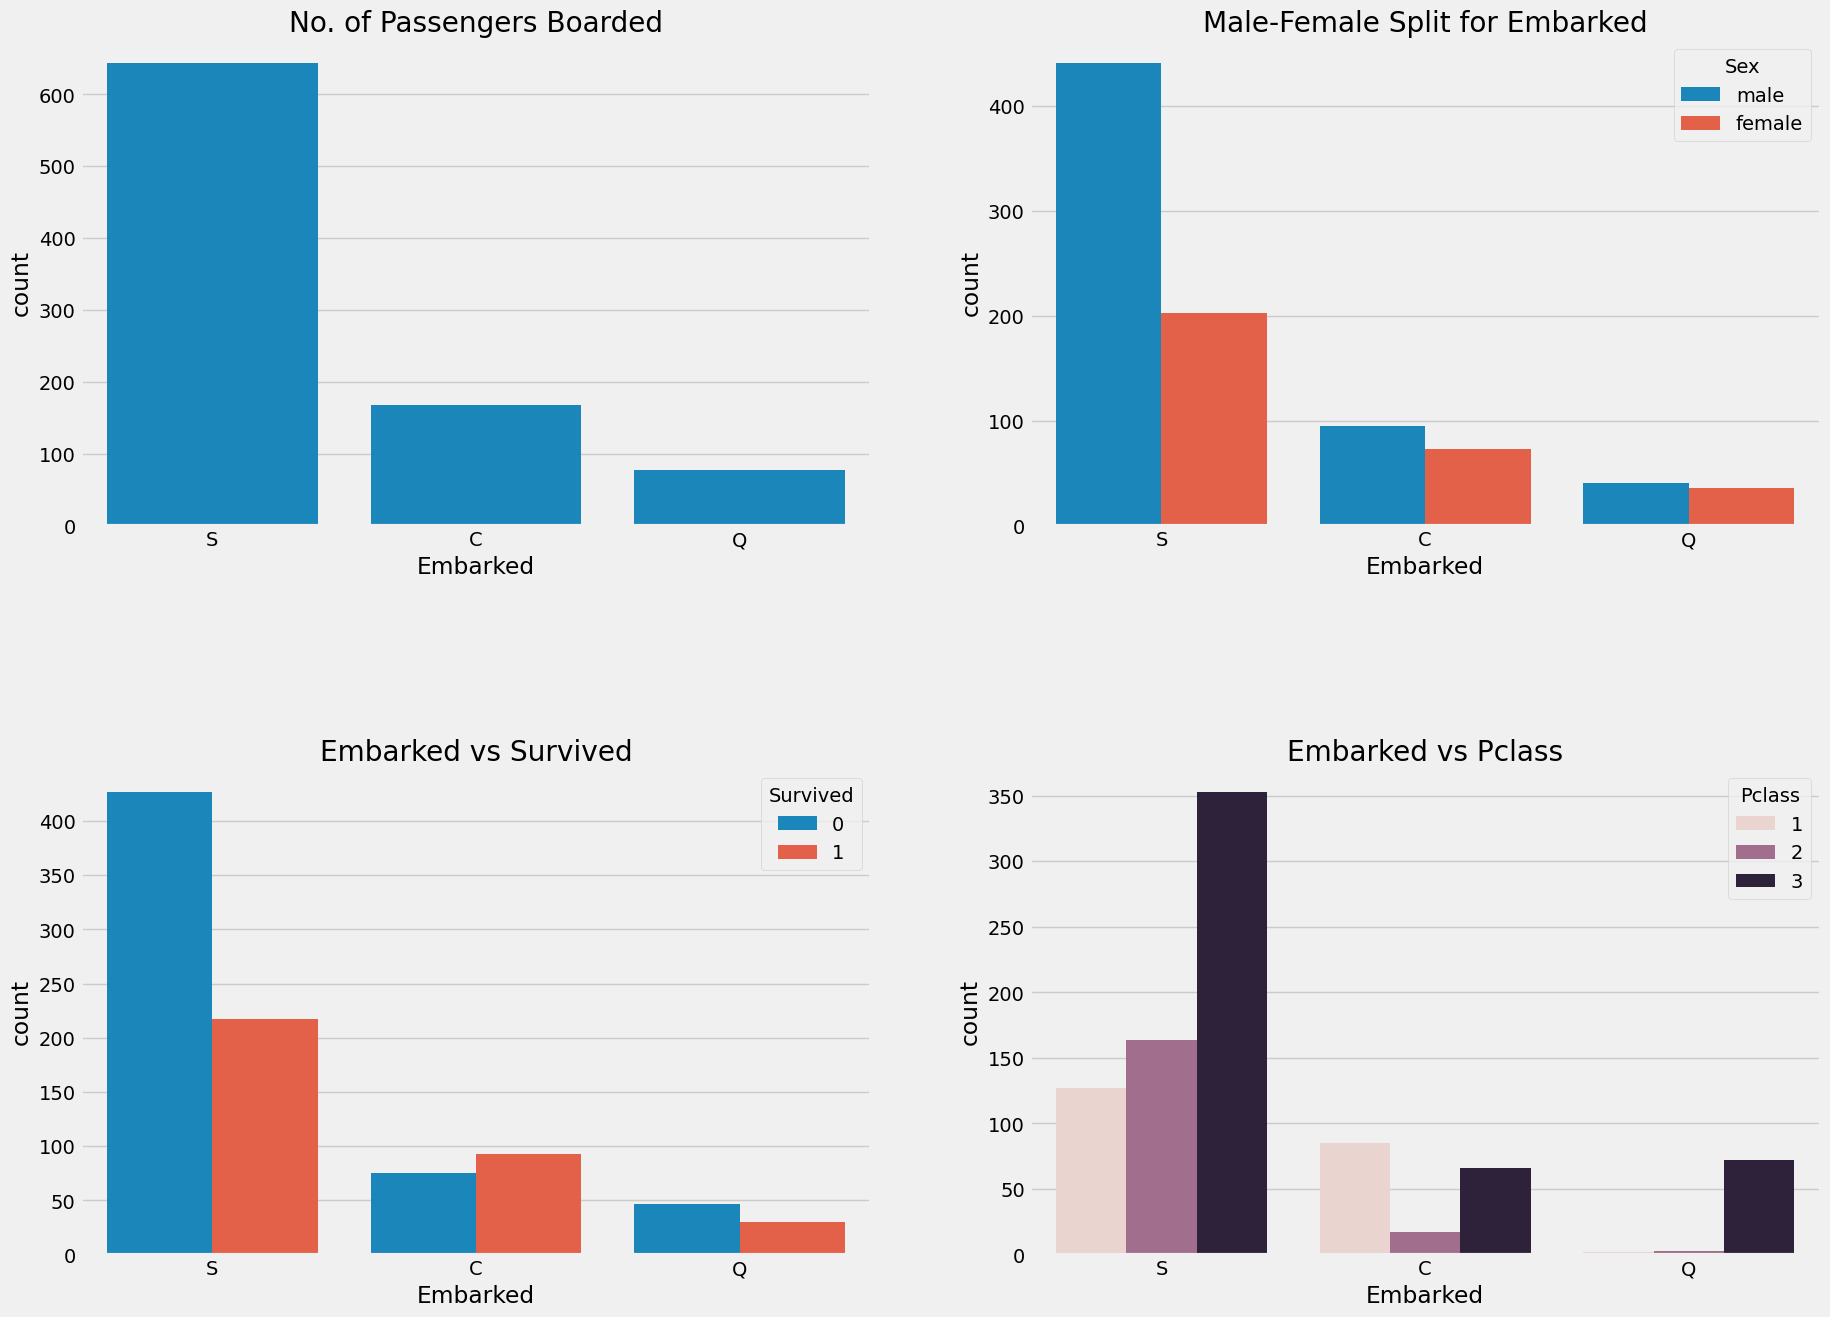

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

관찰
1. 가장 많은 승객이 s항구에서 탑승했으며 대부분 3등석 승객이었다

2. c에서 탑승한 승객들은 상대적으로 생존 비율이 높았는데 그 이유는1,2,등석 승객들이 대부분 구조되었기 때문이다.

3. s는 부유한 승객들이 많이 탑승한 항구이지만 전체 생존률이 낮았고 그 이유는 3등석 승객의 81%정도 생존하지 못했기 때문이다

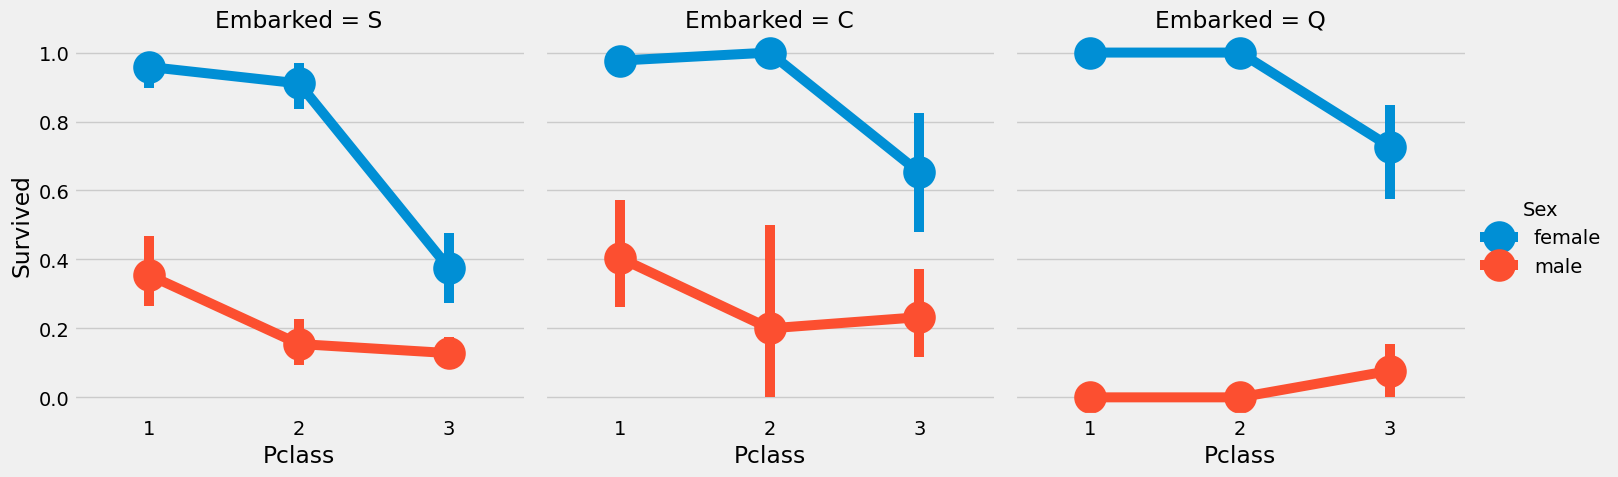

In [ ]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data,kind='point')
plt.show()

관찰
1.1,2등실 여성의 생존기회는 거의 1이다
2. S항구는 3등실 승객에게 매우 불행이다. 여성 남성 모두의 생존률이 매우 낮다
3. Q항구는대부분 3등실이기 때문에 남성에게 가장 불행해보인다

###Filling Embarked NaN
가장 많은 탑승항구가 S이므로 S로 채워 넣는다

In [7]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()

np.False_

###SibSip--> Discrete Feature
혼자이거나 가족 구성원을 나타낸다  
Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [ ]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


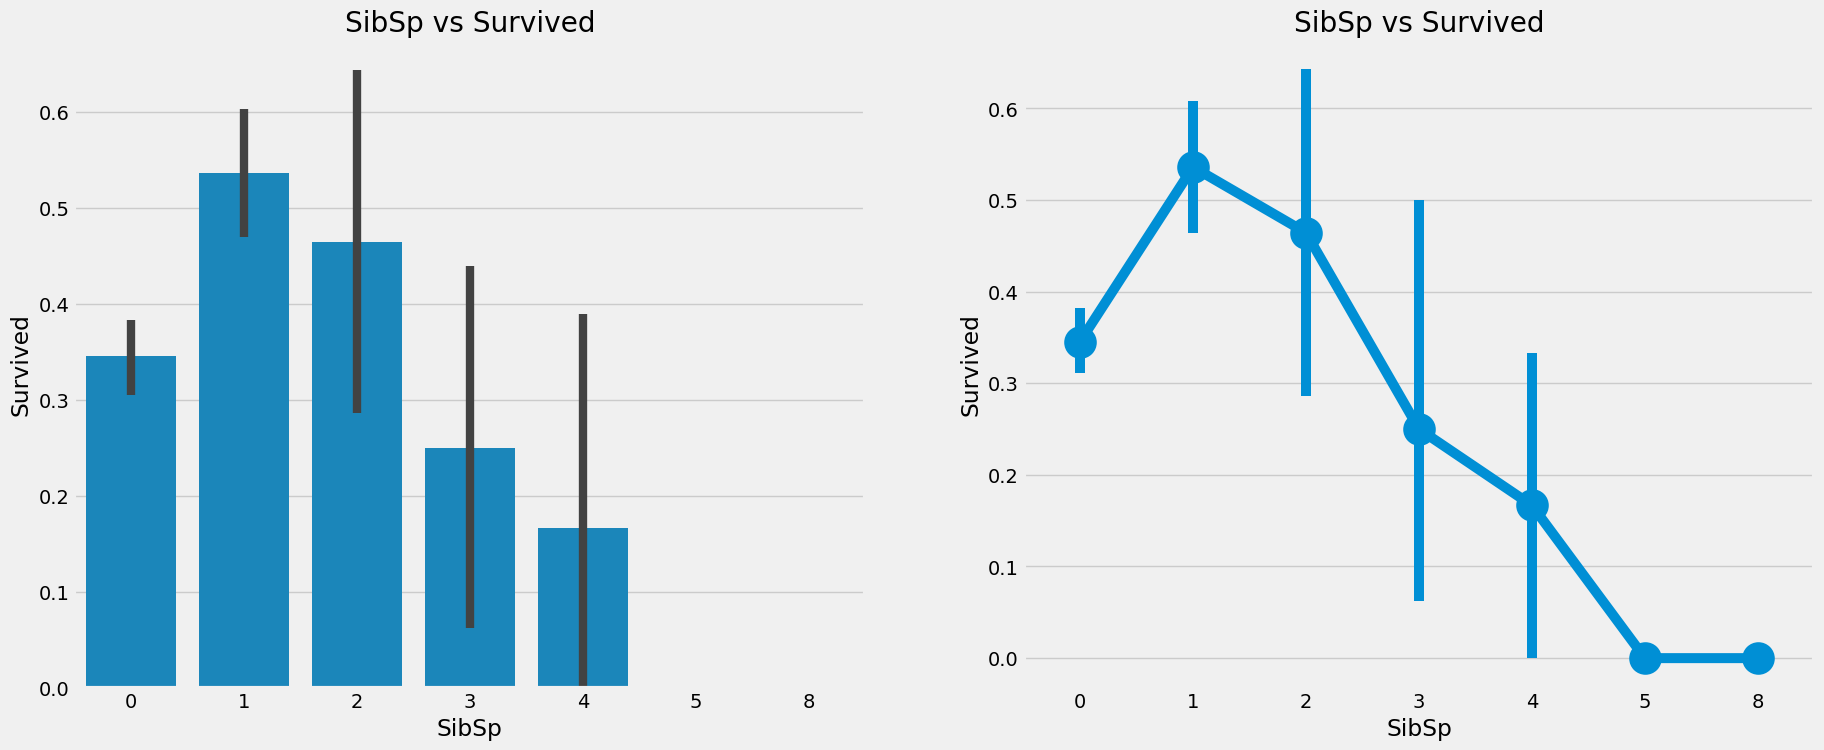

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp',y='Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [ ]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


관찰
1. 그래프 결과: 혼자 탑승한 승객의 생존률 약 34.5%, 형제자매나 배우자 수가 많아질수록 생존률 감소, 자신보다 가족을 먼저 구하려는 경향이 있었기 때문
2. 가족 구성원이 5-8명인 경우 생존률 0%> 교차표로 분석한 결과 모두 3등석으로 3등석 대가족이 모두 사망> 객실등급이 생존 확률에 큰 영향


###Parch

In [ ]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


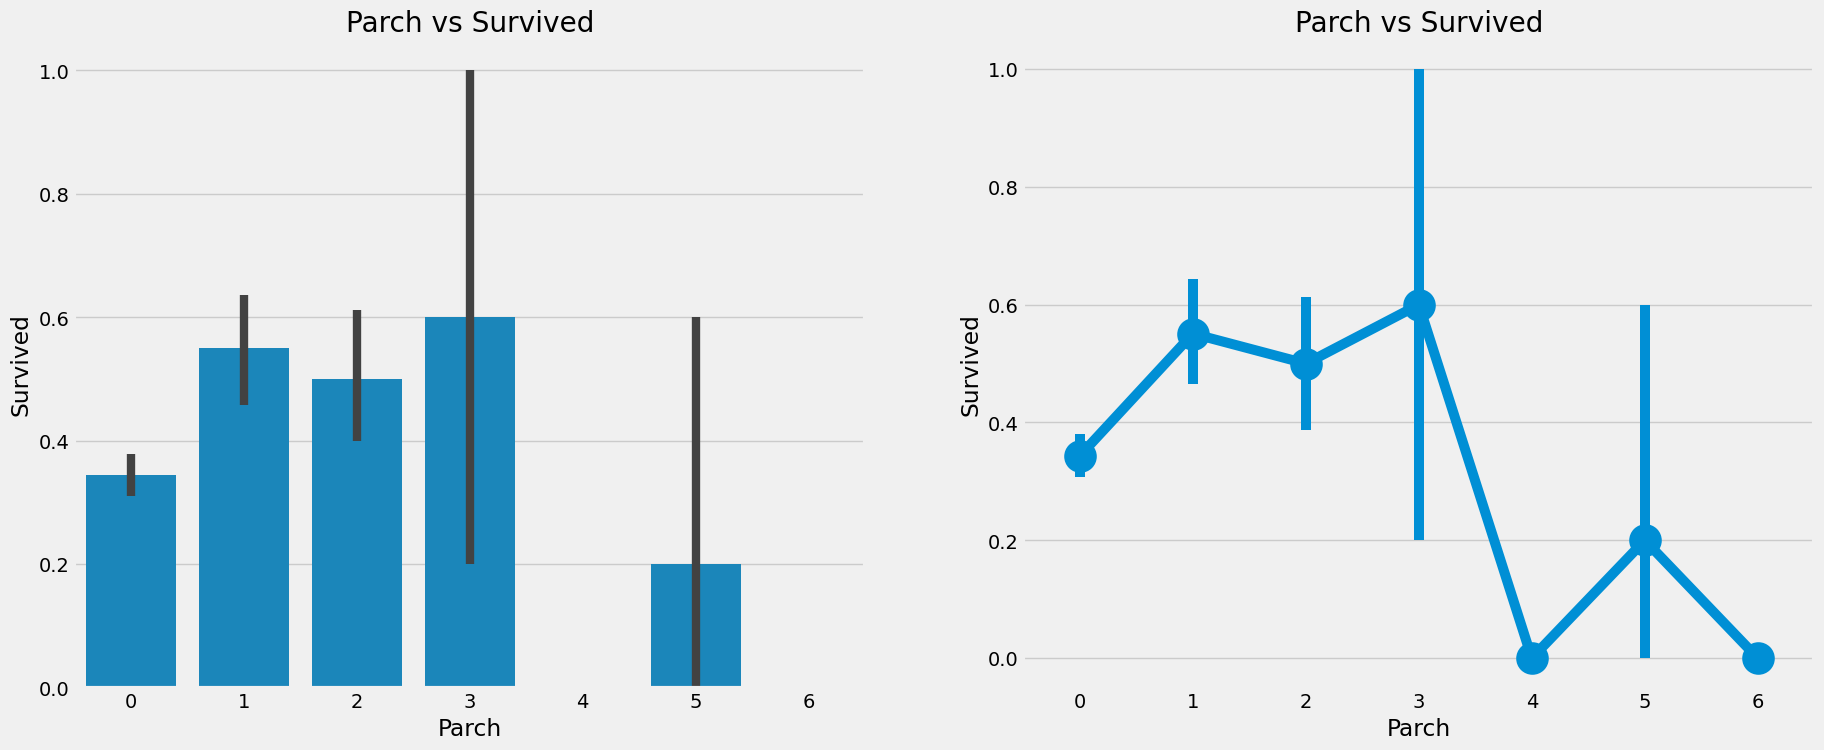

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

관찰
1. SibSp변수와 유사: 부모나 자녀가 함께 탑승한 승객의 생존확률 더 높음
2. 그러나 동반 인원이 많아질수록 생존률 감소
1-3명의 부모나 자녀와 함께 탑승한 승객의 생존률이 가장 높았다, 혼자 탑승한 승객의 생존률이 낮고, 4명 이상과 함께한 대가족의 생존률은 매우 낮았다

###Fare--> Countinous Feature


In [ ]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was: ',data['Fare'].mean())


Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was:  32.204207968574636


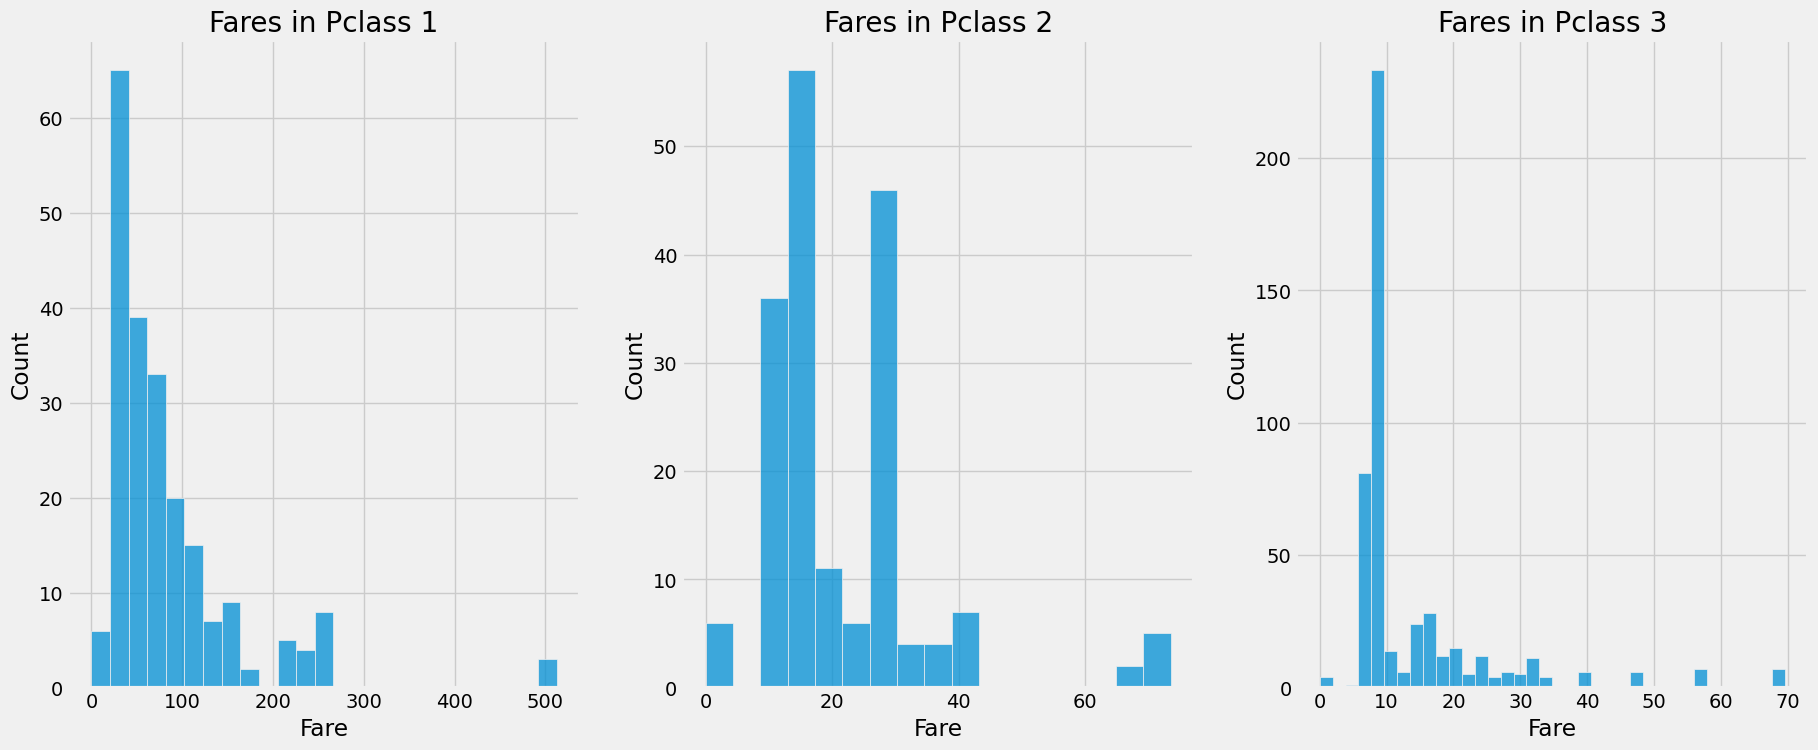

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.histplot(x=data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.histplot(x=data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.histplot(x=data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

관찰  
1등석 승객들의 요금 분포가 매우 넓게 퍼져 있으며, 객실 등급이 낮아질수록 그 분포가 점점 줄어드는 것으로 보인다. 또한, 이 변수는 연속형이므로 구간화(binning)를 통해 이산형 값으로 변환할 수 있다.

###피처 총정리
* 여성의 생존률이 남성보다 높음
* 객실 등급: 1등실 객실의 생존률 높고, 3등실 객실의 생존률 매우 낮음, 여성의 경우 1등실 생존률 거의 1이고 2등실도 높음, 돈이 좋다
* 나이: 5-10세 아이의 생존률이 높다, 15-35세 승객들이 많이 사망
* 탑승항구: C항구에서 탄 승객의 생존률이 높음: s보다 1등실 승객이 적을 지라도, Q항구에서 탑승한 사람들은 거의 3등실
* Parch+ SibSp: 1-2 가족 또는 1-3 부모를 두면 생존률이 올라감, 혼자거나 대가족의 생존률 낮음

### 피처들의 상관성

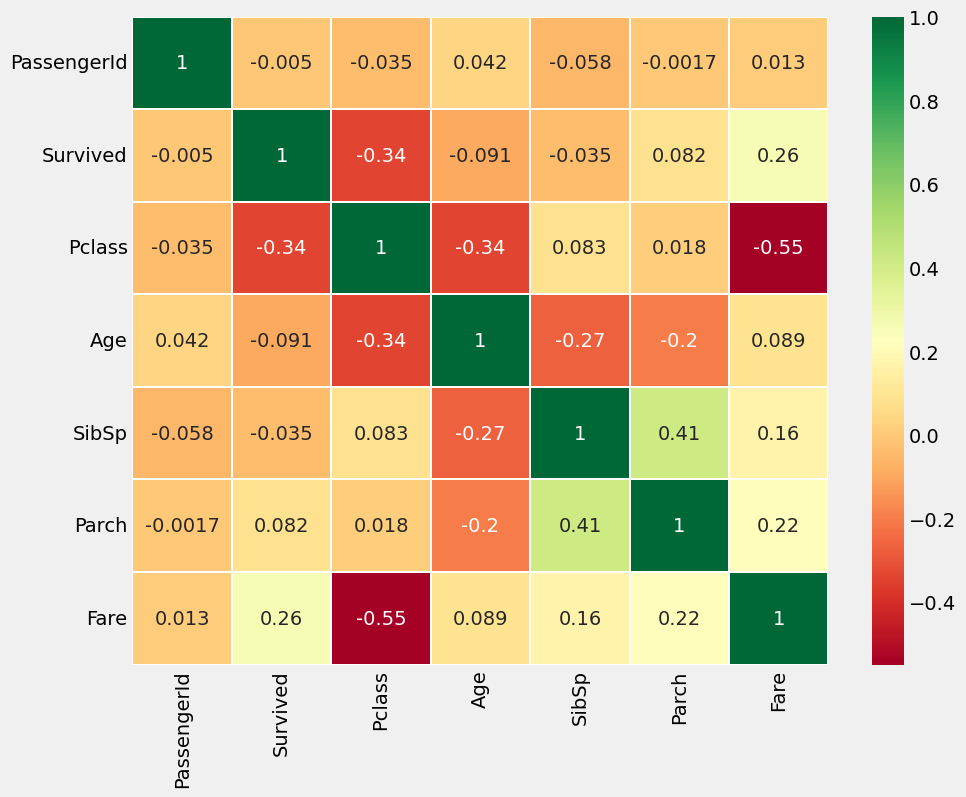

In [ ]:
cols = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']
sns.heatmap(data[cols].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

high positive: 두개의 피처가 매우 유사한 정보를 담고 있고 정보에 분산이 거의 없다는 의미/ 다중공선성(여러 독립변수들 사이에 강한 상관관계 존재)
> 둘중 하나는 불필요하다. 불필요한 피처를 제거하면 학습시간을 줄이고 많은 이득을 준다.

> 히트맵에서 우리는 많은 피처들이 상관되어있지 않은 것을 볼 수 있다. 가장 높은 상관성은 SibSp과 Parch 사이인 0.41이다. 따라서 우리는 모든 피처를 가져갈 수 있다.

#Part 2: Feature Engineering and Data Cleaning

이제 피처 엔지니어링이 무엇인가?
어떤 피처들의 데이터셋이 주어졌건 모든 피처가 반드시 중요한 것은 아니다. 많은 불필요한 피처들이 있고 그 피처들은 제거되어야한다. 또한 우리는 관측으로부터 새로운 피처들을 얻거나 다른 피처로부터 새로운 정보를 추출할 수 있다.

한가지 예시가 이름 피처로부터 initial feature를 얻는 것이다. 새로운 피처를 얻거나 조금 제거할 수 있는지 보자. 또하느 우리는 존재하는 관련 피처들을 예측모델에 적합하게 변환할 수 있다.

###Age_band

연속값을 binning을 통해 카테고리값으로 바꾸자

80세까지 있으므로 0-80세를 5개로 나누자(bins of size 16)

In [8]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>=64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [9]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
Age_band,
1,382
2,325
0,104
3,67
4,13


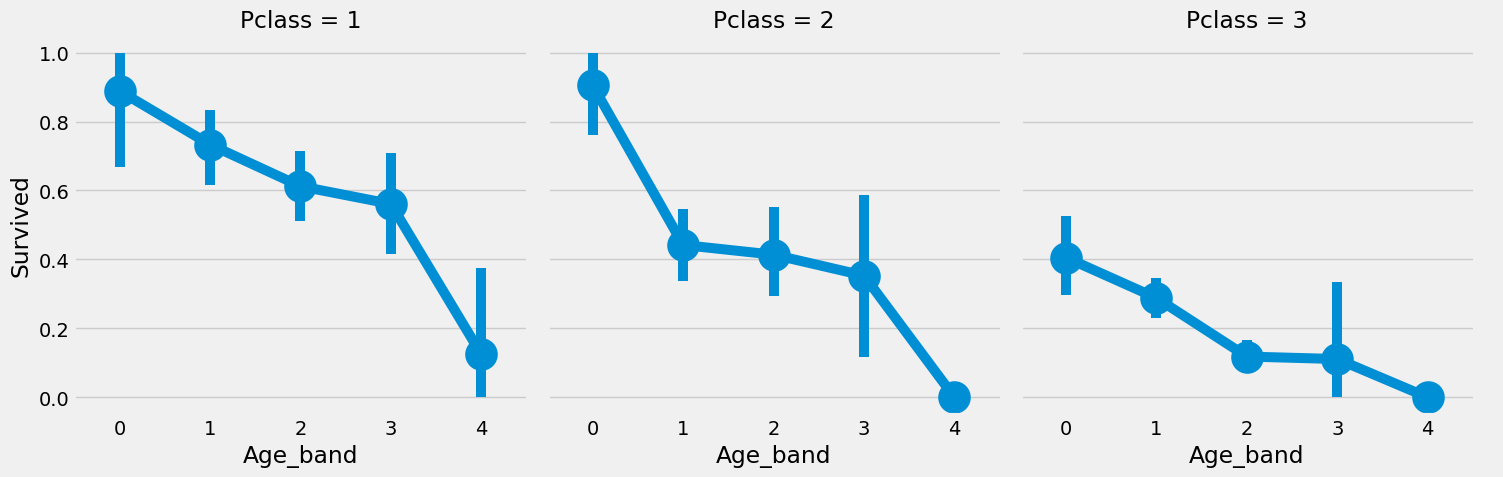

In [12]:
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass',kind='point')
plt.show()

나이가 많아질수록 생존률 감소, 객실 등급이 올라갈수록 생존률 증가

###Family_Size and Alone

새로운 피처 생성: Family_Size, Alone by Parch+SibSp

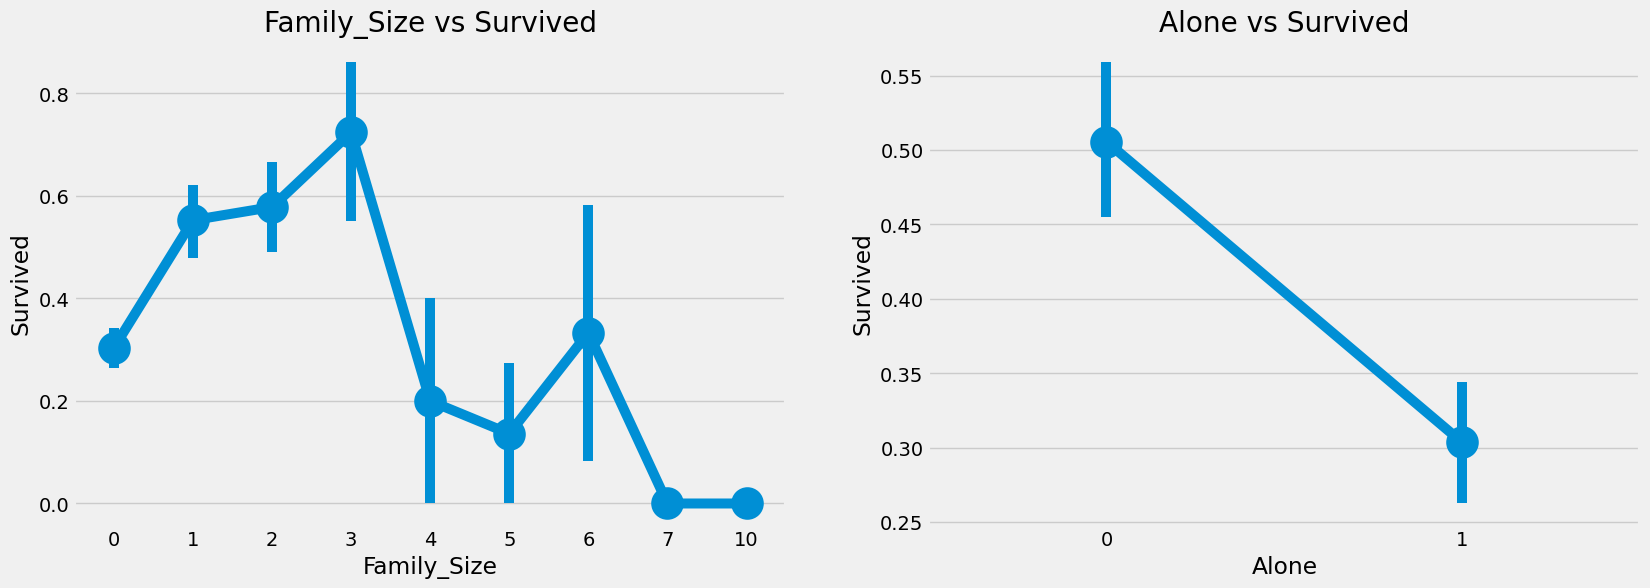

In [15]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#Family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='Family_Size',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

혼자있을수록 생존확률 매우 낮음. 4인 초과의 가족도 생존기회 줄어듦. 중요한 피처로 보임

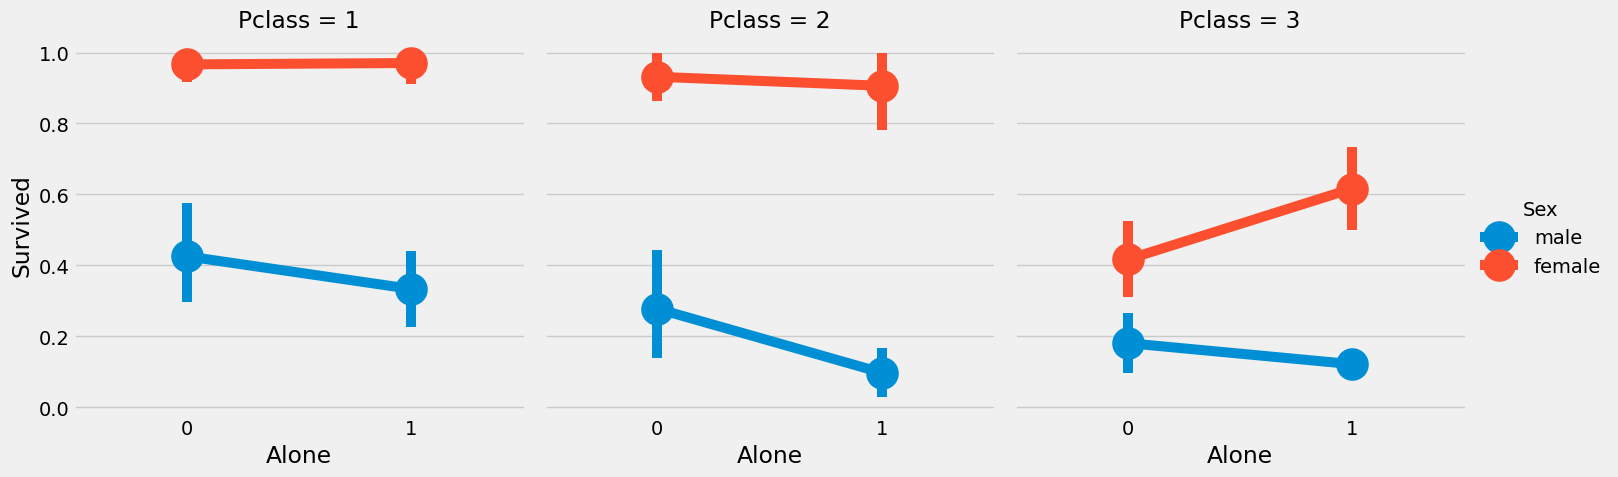

In [17]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass',kind='point')
plt.show()

3등실 여성을 제외하고 혼자있을경우 생존률 낮아짐

###Fare_Range
pandas.qcut를 이용해 요금을 ordinal value로 바꿈

bins 수를 쓰면 동일하게 잘라줌

In [18]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 이야기했듯이 요금 레인지가 증가할수록 생존 기회가 증가함
따라서 나이 밴드처럼 만들어야함

In [20]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31.0),'Fare_cat']=2
data.loc[(data['Fare']>31.0)&(data['Fare']<=513),'Fare_cat']=3

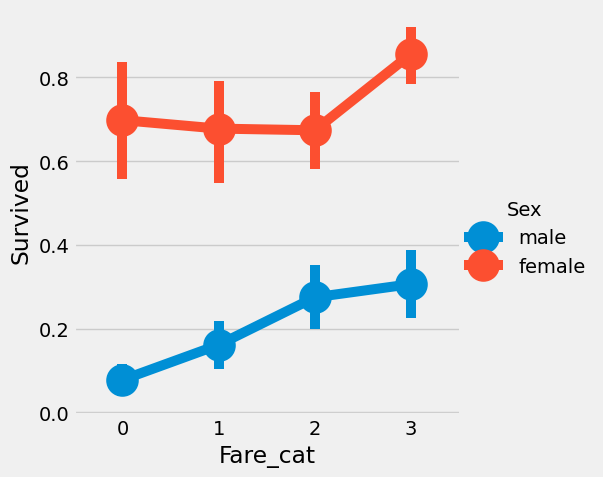

In [22]:
sns.catplot(x='Fare_cat',y='Survived',hue='Sex',data=data,kind='point')
plt.show()

명확하게 요금 카테고리가 증가할수록 생존 기회가 높아짐. 성별에 따라 모델링할때 중요한 피처이다

##Converting String Value into Numeric

우리는 모델에 스트링을 넣을 수 없기 때문에 숫자값으로 변환해야한다: Sex, Embarked 등

###Dropping UnNeeded Features

Name,Age(Age_band있으므로),Ticket,Fare(Fare_cat있으므로),Cabin,Fare_Range(Fare_cat있으므로),PassengerId

In [24]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

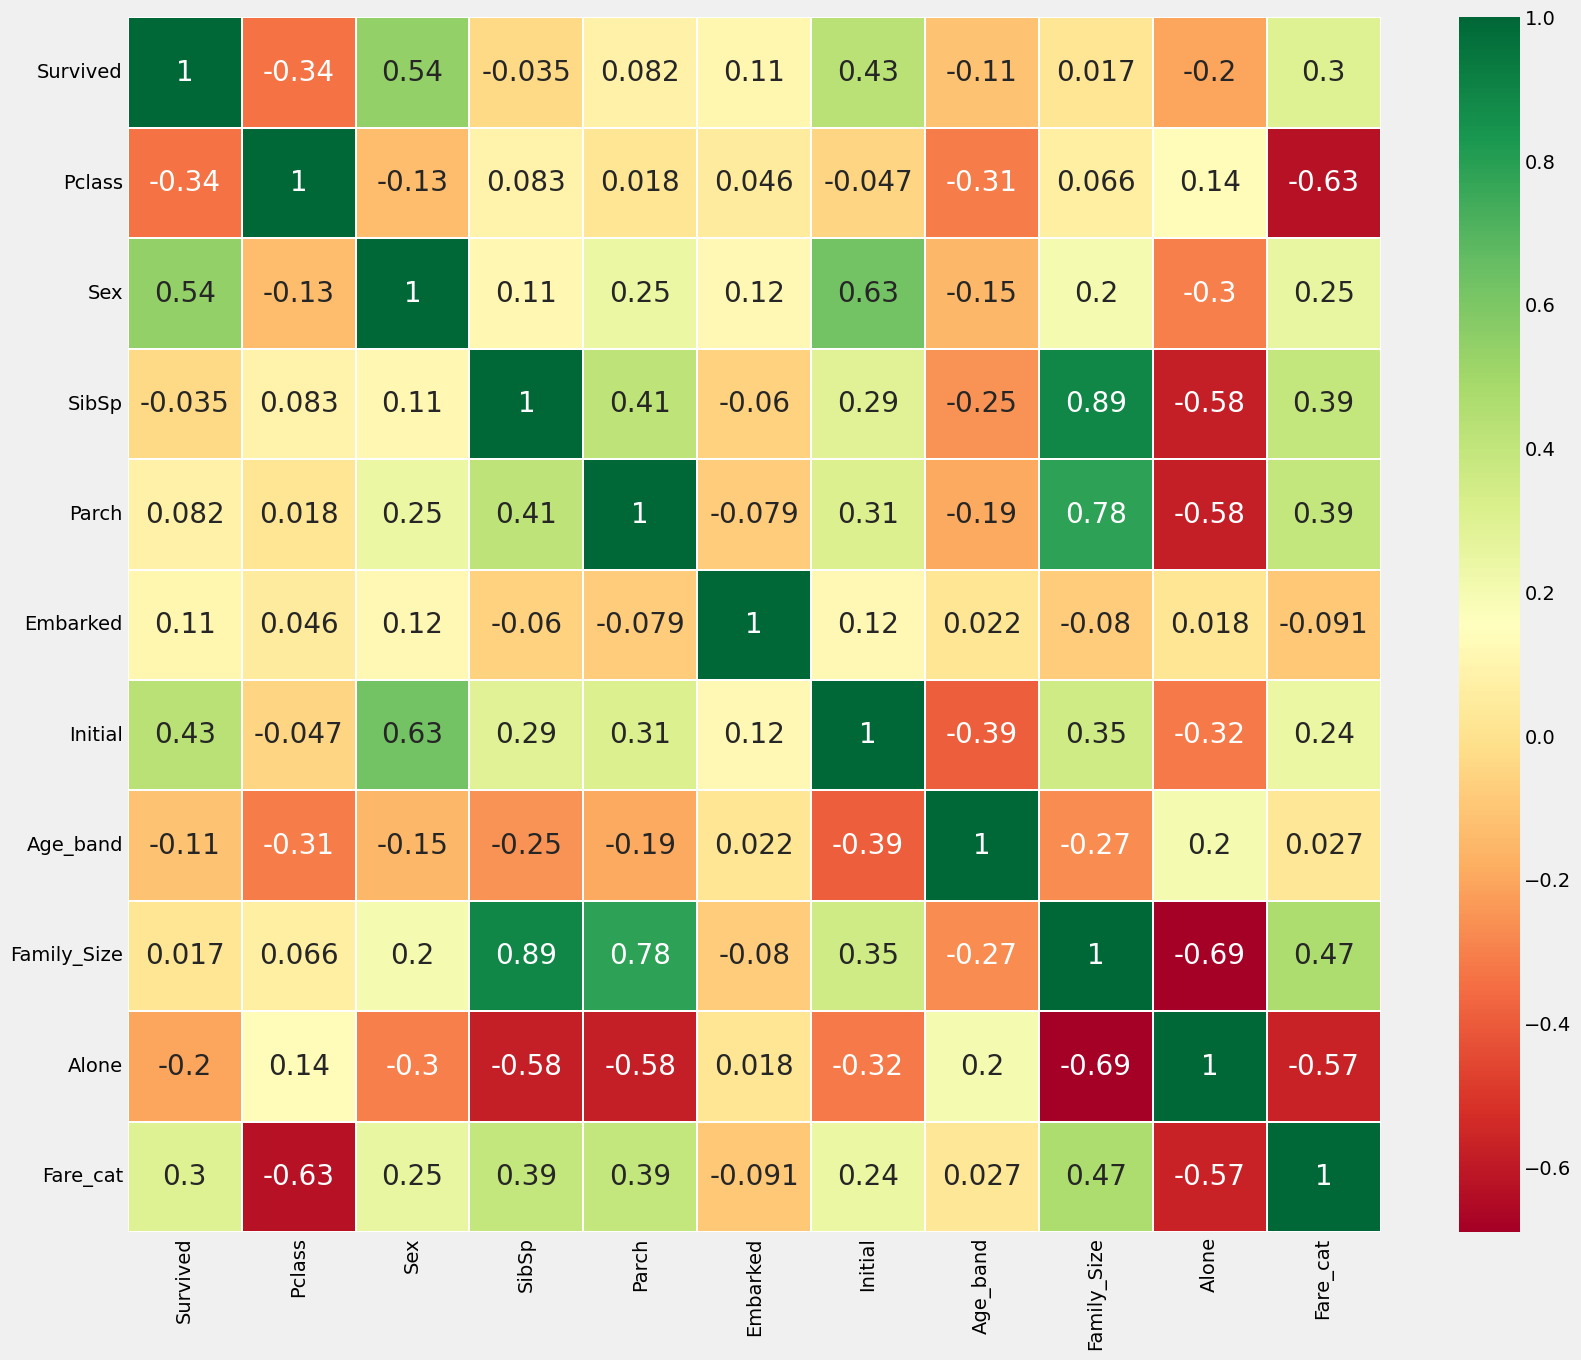

In [26]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

그중 일부는 SibSp와 Family_Size, Parch와 Family_Size처럼 양의 상관관계(positive correlation) 를 가지며,
Alone과 Family_Size처럼 음의 상관관계(negative correlation) 를 가지는 것도 있다.

#Part3: Predictive Modeling

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [32]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']


##Radial Support Vector Machines(rbf-SWM)

In [33]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is 0.835820895522388


##Linear Support Vector Machine(linear-SVM)

In [34]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is ',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is  0.8171641791044776


##Logistic Regression

In [35]:
model=LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('Accuracy for Logistic Regression is ', metrics.accuracy_score(prediction3,test_Y))

Accuracy for Logistic Regression is  0.8134328358208955


##Decision Tree

In [37]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('Accuracy for Decision Tree is ', metrics.accuracy_score(prediction4,test_Y))

Accuracy for Decision Tree is  0.8097014925373134


##K-Nearest Neighbors(KNN)

In [38]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('Accuracy of KNN is ', metrics.accuracy_score(prediction5,test_Y))

Accuracy of KNN is  0.8134328358208955


n_neighbours를 달리하며 정확도 변화를 보기(디폴트:5)

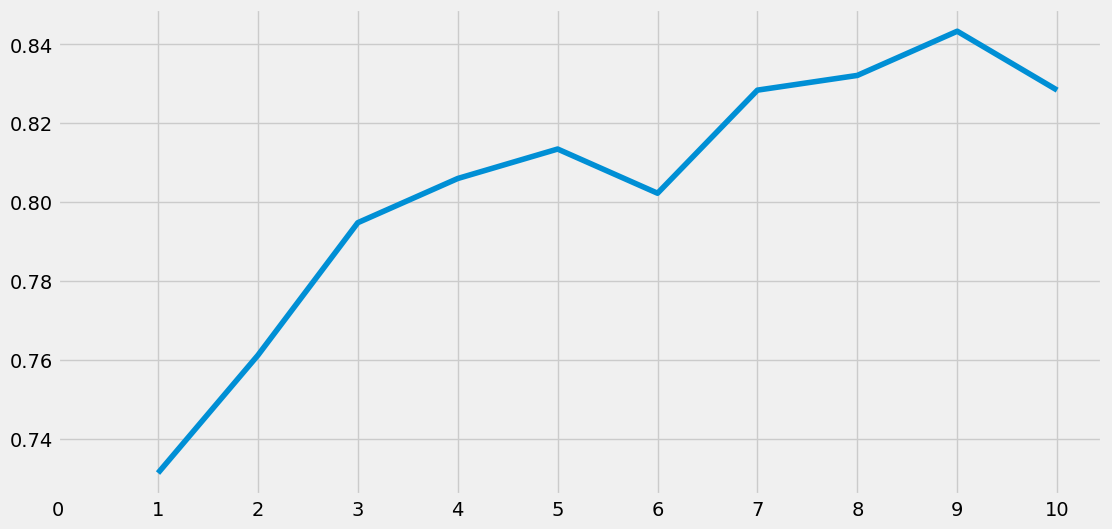

Accuracy for different values of n are:  [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84328358 0.82835821] with the max value as 0.8432835820895522


In [42]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X,train_Y)
  prediction=model.predict(test_X)
  a = pd.concat([a, pd.Series([metrics.accuracy_score(prediction, test_Y)])],
                 ignore_index=True)
plt.plot(a_index,a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracy for different values of n are: ',
      a.values,'with the max value as',a.values.max())

##Gaussian Naive Bayes

In [44]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('Accuracy of the NaiveBayes is ',metrics.accuracy_score(prediction6,test_Y))

Accuracy of the NaiveBayes is  0.8134328358208955


##Random Forests

In [45]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('Accuracy for Random Forest is ',metrics.accuracy_score(prediction7,test_Y))


Accuracy for Random Forest is  0.8208955223880597


모델의 정확도(accuracy)는 **분류기의 견고함(robustness)** 을 결정하는 **유일한 요소가 아니다.**

예를 들어, 어떤 분류기가 학습용 데이터(training data)로 학습되고, 테스트 데이터(test data)로 검증했을 때 **정확도 90%**를 얻었다고 하자.

겉보기에는 매우 높은 정확도로 보이지만,

> 새로운 테스트 세트에 대해서도 항상 90%의 정확도를 보장할 수 있을까?
> 그 답은 **“아니오”** 이다.

그 이유는,
모델이 학습에 사용하는 데이터 인스턴스가 매번 다를 수 있기 때문이다.
즉, 학습 데이터와 테스트 데이터가 달라질 때마다 정확도 또한 **증가하거나 감소**할 수 있다.
이러한 현상을 **모델 분산(Model Variance)** 이라고 한다.

---

### ✅ 이를 해결하고 일반화된(generalized) 모델을 얻기 위해 사용하는 방법이 바로 **교차 검증(Cross Validation)** 이다.

---

### 🔹 Cross Validation의 필요성

데이터가 **불균형(imbalanced)** 할 때 —
예를 들어, 클래스 1의 데이터가 많고 다른 클래스의 데이터가 적은 경우 —
모델이 데이터의 특정 부분에만 잘 작동할 수 있다.
따라서 모델을 **데이터셋의 모든 인스턴스**에 대해 학습하고 평가해야 한다.
그 후 각 실험의 정확도를 평균내어 전체적인 성능을 평가한다.

---

### 🔹 K-Fold Cross Validation의 작동 방식

1️⃣ **데이터셋을 K개의 하위 집합(subset)** 으로 나눈다.

2️⃣ 예를 들어 **K=5**라면, 데이터셋을 5개로 나누고
이 중 **1개를 테스트용**, 나머지 **4개를 학습용**으로 사용한다.

3️⃣ 이 과정을 **테스트용 집합을 바꿔가며 K번 반복**한다.
각 반복에서 계산된 **정확도(accuracy)** 와 **오차(error)** 를 평균내어
알고리즘의 **평균 정확도(average accuracy)** 를 구한다.

이 방법을 **K-Fold Cross Validation** 이라고 한다.

---

4️⃣ 어떤 알고리즘은 특정 훈련 데이터에서는 **언더피팅(underfitting)**,
다른 훈련 데이터에서는 **오버피팅(overfitting)** 을 일으킬 수 있다.
하지만 **교차 검증(Cross Validation)** 을 통해
데이터 전체에 대해 학습·검증을 반복함으로써
**보다 일반화된(generalized) 모델**을 얻을 수 있다.


In [46]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

kfold = KFold(n_splits=10, shuffle=True, random_state=22)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression',
             'KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),
        RandomForestClassifier(n_estimators=100)]

for i in models:
  model=i
  cv_result=cross_val_score(model, X,Y,cv=kfold,scoring='accuracy')
  cv_result=cv_result
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)

In [47]:
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.807016,0.035763
Decision Tree,0.805868,0.048058
Naive Bayes,0.796966,0.056810
Random Forest,0.815993,0.045820


<Axes: >

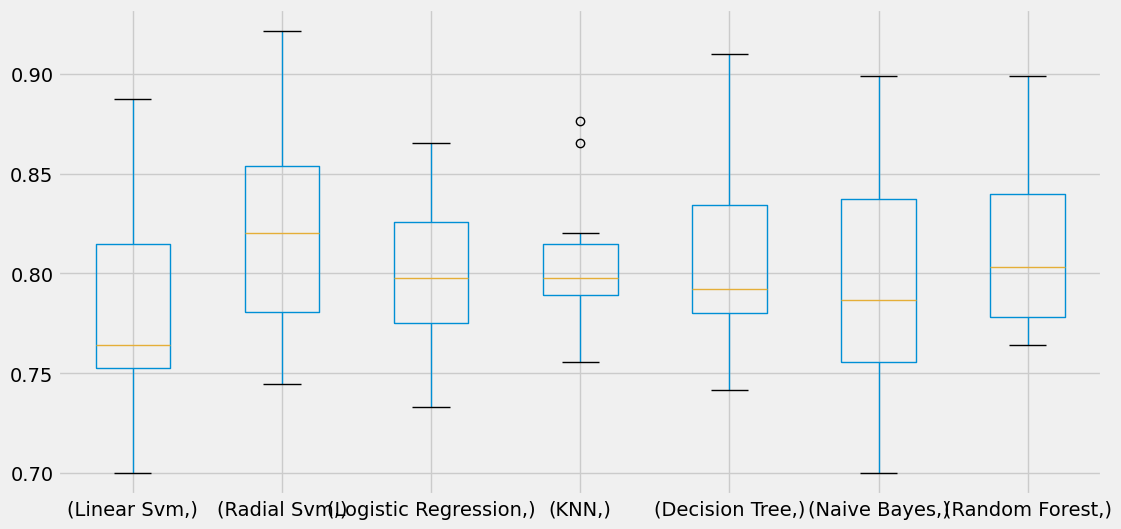

In [48]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

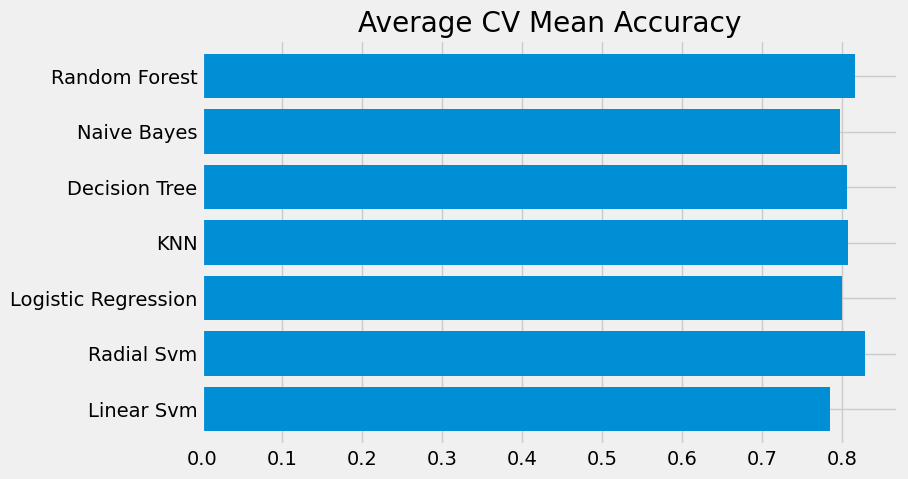

In [50]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

정확도는 종종 misleading한다 > confusion matrix를 봐보자

##Confusion Matrix

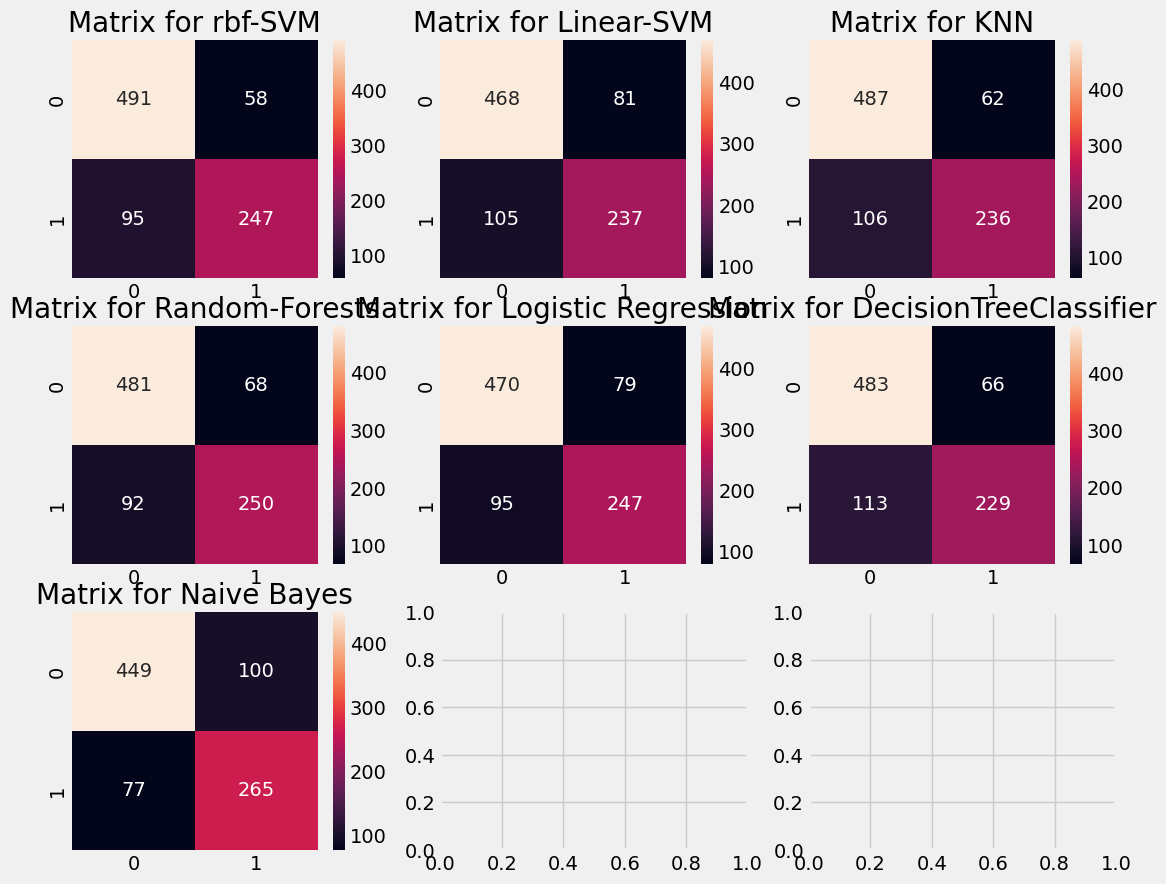

In [52]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred=cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred=cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred=cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred=cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred=cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred=cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for DecisionTreeClassifier')

y_pred=cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.show()

혼동 행렬(Confusion Matrix) 해석

왼쪽 대각선은 각 클래스에서 정확하게 예측된 개수를 나타내고,
오른쪽 대각선은 잘못 예측된 개수를 나타낸다.

예를 들어, rbf-SVM의 첫 번째 혼동 행렬을 보자:

정확하게 예측된 개수는 491명(사망자) + 247명(생존자) 로,
평균 교차 검증 정확도는 (491 + 247) / 891 = **82.8%**이며,
이는 앞서 얻은 정확도와 일치한다.

오류 → 잘못 분류된 경우는 58명의 사망자를 생존자로,
95명의 생존자를 사망자로 예측했다.
즉, 사망자를 생존자로 잘못 예측한 경우가 더 많다.

모든 혼동 행렬을 비교해 보면,
rbf-SVM은 사망자를 더 정확히 예측하는 경향이 있고,
Naive Bayes는 생존자를 더 정확히 예측하는 경향이 있다.

##Hyper-Parameters Tuning

가장 성능이 좋았던 두 모델 SVM, RandomForest의 하이퍼 파리미터 튜닝

In [53]:
from sklearn.model_selection import GridSearchCV
C=[0.05, 0.1, 0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


##Random Forests

In [54]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8204444165463561
RandomForestClassifier(n_estimators=700)


##Enssembling
1)Voting Classifier

2)Bagging

3)Boosting

###Voting Classifier

In [55]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))],
                                  voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is: ',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y,cv=10,scoring='accuracy')
print('The cross valided score is ', cross.mean())

The accuracy for ensembled model is:  0.8171641791044776
The cross valided score is  0.8249188514357053


###Bagging

Bagged KNN

배깅(Bagging)은 분산(variance) 이 큰 모델에서 가장 잘 작동한다.
이런 모델의 대표적인 예로는 의사결정나무(Decision Tree) 나 랜덤 포레스트(Random Forests) 가 있다.

KNN의 경우에도 비슷하게 적용할 수 있는데,
n_neighbors 값이 작을수록 모델의 분산이 커지기 때문에,
작은 n_neighbors 값을 사용할 때 배깅(Bagging) 이 효과적이다.

In [58]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),
                        n_estimators=50,random_state=0)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is: ',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is:  0.8208955223880597
The cross validated score for bagged KNN is: 0.8104369538077402


In [59]:
model=BaggingClassifier(estimator=DecisionTreeClassifier(),
                        n_estimators=100,random_state=0)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for Decision Tree is: ',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree is:',result.mean())

The accuracy for Decision Tree is:  0.8283582089552238
The cross validated score for Decision Tree is: 0.8182646691635455


###Boostion

1. AdaBoost

In [60]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is: ',result.mean())

The cross validated score for AdaBoost is:  0.8136828963795256


2. Stochastic Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is: ',result.mean())

The cross validated score for Gradient Boosting is:  0.8171535580524344


3. XGBoost

In [69]:
import xgboost as xg
xgb=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgb,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is: ',result.mean())

The cross validated score for XGBoost is:  0.8160174781523096


캐글에서는 1번이 가장 높음
하이퍼 파라미터 튜닝

In [64]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.4, n_estimators=800)


###Confusion Matrix for the best model

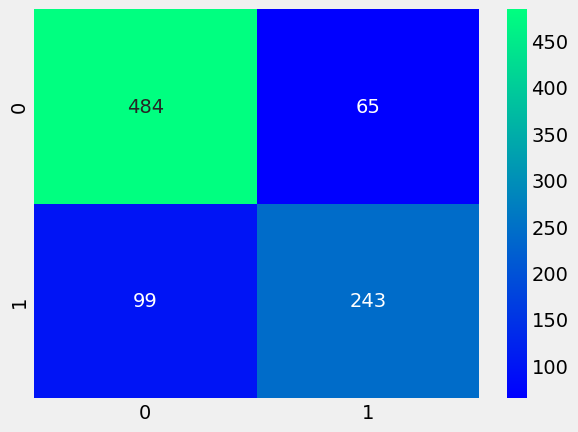

In [66]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

###Feature Importance

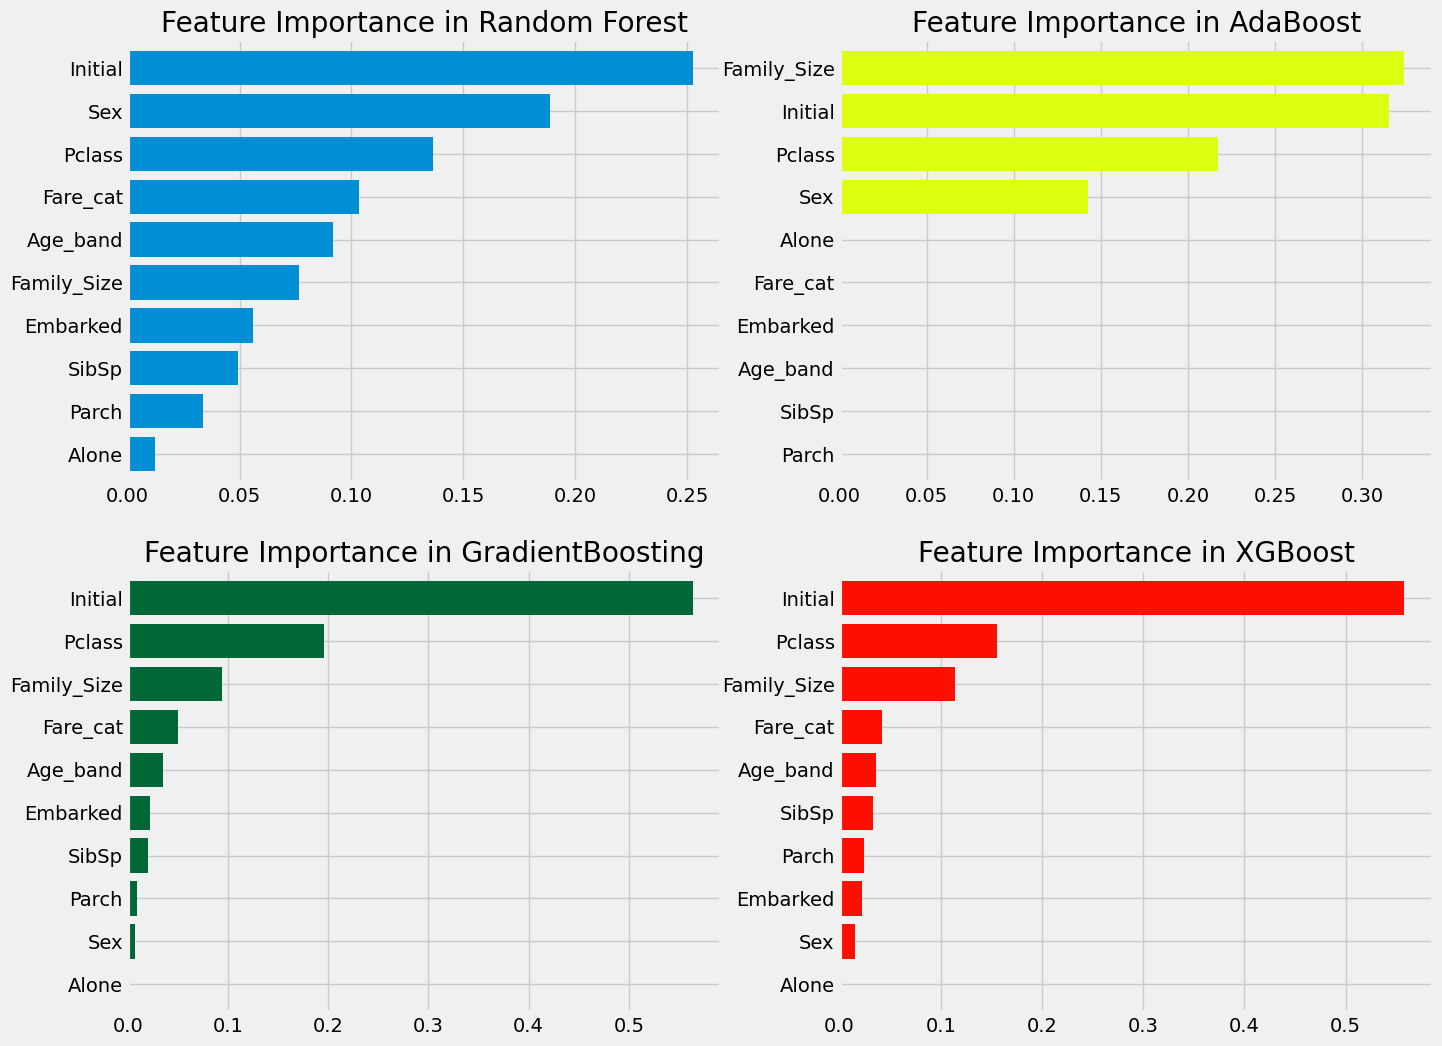

In [70]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forest')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#ddff11',ax=ax[0,1])
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,cmap='RdYlGn_r',ax=ax[1,0])
ax[1,0].set_title('Feature Importance in GradientBoosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#FD0F00',ax=ax[1,1])
ax[1,1].set_title('Feature Importance in XGBoost')

plt.show()